# Udacity Machine Learning Engineer Nanodegree

- _Project from the Kaggle competition: [Jigsaw unintended bias in toxicity classification](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/overview)_
- _Field: Natural Language Processing_<br/>


# Definition

## Project Overview

<span class="rubric done">Student provides a high-level overview of the project in layman's terms. Background information such as the problem domain, the project origin, and related data sets or input data is given.</span>

Natural Language Processing is a complex field which is hypothesised to be part of AI-complete set of problems, implying that the difficulty of these computational problems is equivalent to that of solving the central artificial intelligence problem making computers as intelligent as people. <cite data-cite="AiComplete"></cite>
With over 90% of data ever generated being produced in the last 2 years <cite data-cite="ScienceDaily1"></cite> and with a great proportion being human generated unstructured text there is an ever increasing need to advance the field of Natural Language Processing.

Recent UK Government proposal to have measures to regulate social media companies over harmful content, including "substantial" fines and the ability to block services that do not stick to the rules is an example of the regulamentory need to better manage the content that is being generated by users. <cite data-cite="BBCSocialMedia"></cite> 

Other initiatives like [Riot Games](https://www.riotgames.com/en)'s work aimed to predict and reform toxic player behaviour during games <cite data-cite="ArsRiotGame"></cite> is another example of this effort to understand the content being generated by users and moderate toxic content.

However, as highlighted by the Kaggle competition [Jigsaw unintended bias in toxicity classification](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/overview), existing models suffer from unintended bias where models might predict high likelihood of toxicity for content containing certain words (e.g. "gay") even when those comments were not actually toxic (such as "I am a gay woman"), leaving  machine only classification models still sub-standard.

Having tools that are able to flag up toxic content without suffering from unintended bias is of paramount importance to preserve Internet's fairness and freedom of speech.


## Problem Statement

<span class="rubric">The problem which needs to be solved is clearly defined. <span class="warn">A strategy for solving the problem, including discussion of the expected solution, has been made.</span></span>

From [Kaggle](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/overview) competition page:

The Conversation AI team, a research initiative founded by Jigsaw and Google (both part of Alphabet), builds technology to protect voices in conversation. A main area of focus is machine learning models that can identify toxicity in online conversations, where toxicity is defined as anything rude, disrespectful or otherwise likely to make someone leave a discussion.

Last year, in the Toxic Comment Classification Challenge, participants built multi-headed models to recognize toxicity and several subtypes of toxicity. This year's competition is a related challenge: building toxicity models that operate fairly across a diverse range of conversations.

Here's the background: When the Conversation AI team first built toxicity models, they found that the models incorrectly learned to associate the names of frequently attacked identities with toxicity. Models predicted a high likelihood of toxicity for comments containing those identities (e.g. "gay"), even when those comments were not actually toxic (such as "I am a gay woman"). This happens because training data was pulled from available sources where unfortunately, certain identities are overwhelmingly referred to in offensive ways. Training a model from data with these imbalances risks simply mirroring those biases back to users.

In this competition, you're challenged to build a model that recognizes toxicity and minimizes this type of unintended bias with respect to mentions of identities. You'll be using a dataset labeled for identity mentions and optimizing a metric designed to measure unintended bias. Develop strategies to reduce unintended bias in machine learning models, and you'll help the Conversation AI team, and the entire industry, build models that work well for a wide range of conversations.


## Metrics

<span class="done rubric">Metrics used to measure performance of a model or result are clearly defined. Metrics are justified based on the characteristics of the problem.<span>

This competition uses a newly developed metric that combines several submetrics to balance overall performance with various aspects of unintended bias.

Please refer to [evaluation section](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/overview/evaluation) of the competition and the provided [benchmark kernel](https://www.kaggle.com/dborkan/benchmark-kernel) with code to calculate the competition evaluation metrics.

Here are defined the submetrics:

### Overall AUC
This is the ROC-AUC for the full evaluation set.


### Bias AUCs

To measure unintended bias, we again calculate the ROC-AUC, this time on three specific subsets of the test set for each identity, each capturing a different aspect of unintended bias. You can learn more about these metrics in Conversation AI's recent paper *[Nuanced Metrics for Measuring Unintended Bias with Real Data in Text Classification](https://arxiv.org/abs/1903.04561)*. <cite data-cite="1903.04561"></cite>

**Subgroup AUC:** Here, we restrict the data set to only the examples that mention the specific identity subgroup. *A low value in this metric means the model does a poor job of distinguishing between toxic and non-toxic comments that mention the identity*.

**BPSN (Background Positive, Subgroup Negative) AUC:** Here, we restrict the test set to the non-toxic examples that mention the identity and the toxic examples that do not. *A low value in this metric means that the model confuses non-toxic examples that mention the identity with toxic examples that do not*, likely meaning that the model predicts higher toxicity scores than it should for non-toxic examples mentioning the identity.

**BNSP (Background Negative, Subgroup Positive) AUC:** Here, we restrict the test set to the toxic examples that mention the identity and the non-toxic examples that do not. *A low value here means that the model confuses toxic examples that mention the identity with non-toxic examples that do not*, likely meaning that the model predicts lower toxicity scores than it should for toxic examples mentioning the identity.

### Generalized Mean of Bias AUCs

To combine the per-identity Bias AUCs into one overall measure, we calculate their generalized mean as defined below:


$M_p(m_s)=( \frac{1}{N} \sum_{s=1}^{N}m_{s}^{p} )^{\frac{1}{p}}$

where:

MpMp = the ppth power-mean function\
msms = the bias metric mm calulated for subgroup ss\
NN = number of identity subgroups

For this competition, we use a pp value of -5 to encourage competitors to improve the model for the identity subgroups with the lowest model performance.

### Final Metric

We combine the overall AUC with the generalized mean of the Bias AUCs to calculate the final model score:

$score=w_0AUC_{overall}+\sum_{a=1}^{A}w_aM_p(m_{s,a})$

where:

- $A$ = number of submetrics (3)
- $ms_{s,a}$ = bias metric for identity subgroup ss using submetric $a$
$w_a$ = a weighting for the relative importance of each submetric; all four $w$ values set to 0.25

While the leaderboard will be determined by this single number, we highly recommend looking at the individual submetric results, [as shown in this kernel](https://www.kaggle.com/dborkan/benchmark-kernel), to guide you as you develop your models.

# Analysis

## Data Exploration

<span class="rubric">If a dataset is present, features and calculated statistics relevant to the problem have been reported and discussed, along with a sampling of the data. In lieu of a dataset, a thorough description of the input space or input data has been made. Abnormalities or characteristics about the data or input that need to be addressed have been identified.<span>

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [19]:
from notebooks.library.ExploratoryAnalysis \
    import ExploratoryAnalysis, JigsawExploratoryAnalysis
from notebooks.library.Reproducibility \
    import *

train_path = './input/jigsaw-unintended-bias-in-toxicity-classification/train.csv'
test_path = './input/jigsaw-unintended-bias-in-toxicity-classification/test.csv'

explore = JigsawExploratoryAnalysis(train_path = train_path, test_path= test_path)

### Train and test stats

In [20]:
test_percent, toxic_comment_distribution = explore.calculate_stats()

print("The train set contains {} number of samples"\
      .format(len(explore.train)))
print("The test set contains {} number of samples"\
      .format(len(explore.test)))
print("The test set is {0:.1f}% of the training set"\
      .format(test_percent * 100))
print("The test set contains {} toxic comment"\
      .format(explore.train['toxic'].sum().sum()))
print("Toxic comments are {0:.1f}% of the total comments"\
      .format(toxic_comment_distribution * 100))

The train set contains 1804874 number of samples
The test set contains 97320 number of samples
The test set is 5.4% of the training set
The test set contains 106438 toxic comment
Toxic comments are 5.9% of the total comments


### Toxicity score distribution

In [ ]:
sns.distplot(explore.train['target'], \
             hist=False, kde=True, label="Toxicity distribution")

![](images/toxicity-distribution.png)

### Distribution of toxic/non-toxic in the training set per identity


In [21]:
toxic_stats = explore.calculate_toxic_stats_for_identities(threshold=0.0)
    
print(toxic_stats)


                        identity toxic_count  count  toxic_percent na_count
0                           male        8284  80179       0.103319        0
1                         female        7215  73690       0.097910        0
2      homosexual_gay_or_lesbian        2612  15307       0.170641        0
3                      christian        3418  61360       0.055704        0
4                         jewish        1028  10905       0.094269        0
5                         muslim        3731  26650       0.140000        0
6                          black        3745  19563       0.191433        0
7                          white        5350  29948       0.178643        0
8  psychiatric_or_mental_illness        1802  10665       0.168964        0


In [6]:
no_identity_train, identity_train = explore.calculate_no_identity_stats()

In [7]:
no_identity_toxic_count = len(no_identity_train[(no_identity_train['toxic'] > 0)])
no_identity_count = len(no_identity_train)
no_identity_toxic_percent = no_identity_toxic_count / no_identity_count
identity_count = len(identity_train)
assert(identity_count  + no_identity_count == len(explore.train))

In [8]:
print("The number of samples with no identity is {}"\
      .format(no_identity_count))
print("The number of samples with no identity that are toxic is {}"\
      .format(no_identity_toxic_count))
print("The percentage of samples with no identity that are toxic is {0:.2f}% "\
      .format(no_identity_toxic_percent * 100))
print("Train len is {}".format(len(explore.train)))
print("The number of samples with at least one identity is {}"\
      .format(identity_count))
print("The percentage of samples with one or more identity set is {0:.2f}%"\
      .format(identity_count/len(explore.train) * 100))


The number of samples with no identity is 1594682
The number of samples with no identity that are toxic is 84154
The percentage of samples with no identity that are toxic is 5.28% 
Train len is 1804874
The number of samples with at least one identity is 210192
The percentage of samples with one or more identity set is 11.65%


### Distribution of toxic /non-toxic in subgroups

<span class="warn">
    Check subgroups threshold (e.g. 0.5) in Kaggle description
</span>

In [9]:
toxic_subgroup_stats = explore.calculate_toxic_stats_for_subgroups()

print(toxic_subgroup_stats)

          subgroup toxic_count   count  toxic_percent na_count
0  severe_toxicity       57906  104636       0.553404        0
1          obscene       70993  147175       0.482371        0
2           threat       32254  106929       0.301639        0
3           insult      105030  454539       0.231069        0
4  identity_attack       62139  218552       0.284321        0
5  sexual_explicit       24484   68926       0.355222        0


### Is there a correlation between identities

Sample 10000 records and check if there is any evident correlation between identities

In [ ]:
sns.pairplot(explore.train[JigsawExploratoryAnalysis.identity_columns].sample(10000))

![](images/identity-correlation-plot.png)

### Exploring some toxic comments with special characters


Special characters might indicate camouflaged swear words.

In [31]:
special_char_toxic = explore.train[\
                                   (explore.train.comment_text.str.contains('[#@$]{2,}')) \
                                   & (explore.train.toxic == 1)]

In [32]:
c = [x for x in special_char_toxic.sample(100, random_state=123).comment_text]

In [42]:
print("...{}".format(c[6][-40:]))

... i cant say $#it, dp mods are pathetic 😅


In [43]:
print("...{}".format(c[8][-40:]))

...lt thank you for saving your sorry a$$'s


### Comments lengths

In [24]:
from notebooks.library.ObsceneTextPreprocessor \
    import ObsceneTextPreprocessor


In [30]:
processor = ObsceneTextPreprocessor()

sample = explore.train['comment_text'].sample(10000)
document_lengths = [len(processor.clean_doc(doc)) for doc in sample]

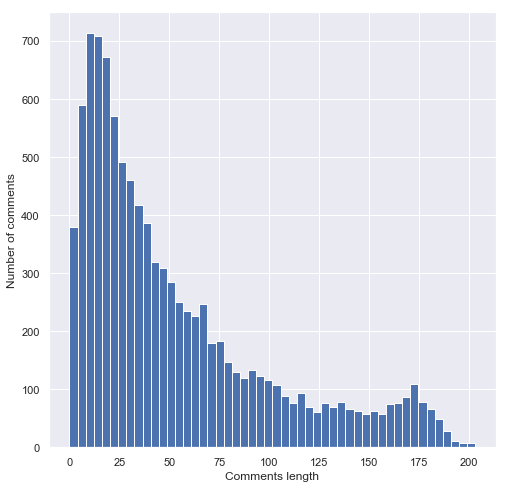

In [31]:
fig = plt.figure(figsize=(8, 8)) 
plt.xlabel('Comments length')
plt.ylabel('Number of comments')
plt.hist(document_lengths, bins=50)
plt.show()

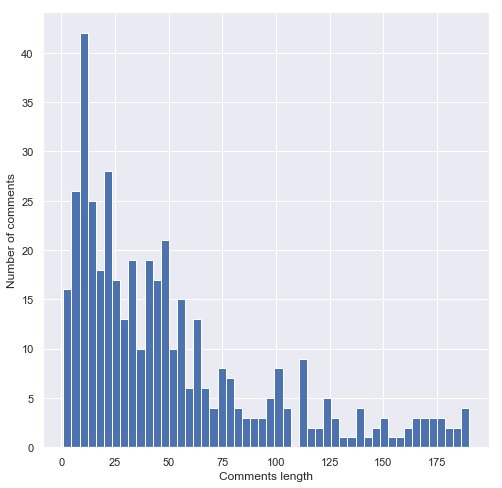

In [43]:
toxic_length = [t[0] for t in zip(document_lengths, explore.train['toxic'] > 0.5 ) if t[1]]

fig = plt.figure(figsize=(8, 8)) 
plt.xlabel('Comments length')
plt.ylabel('Number of comments')
plt.hist(toxic_length, bins=50)
plt.show()

## Exploratory Visualization

<span class="rubric"> A visualization has been provided that summarizes or extracts a relevant characteristic or feature about the dataset or input data with thorough discussion. Visual cues are clearly defined.</span>

## Algorithms and Techniques

<span class="rubric"> Algorithms and techniques used in the project are thoroughly discussed and properly justified based on the characteristics of the problem.</span>

Reproducibility

```
Epoch 1/10 	 loss=0.1107 	 time=215.25s
Epoch 2/10 	 loss=0.0964 	 time=214.80s
Epoch 3/10 	 loss=0.0919 	 time=217.40s
Epoch 4/10 	 loss=0.0892 	 time=214.78s
Epoch 5/10 	 loss=0.0873 	 time=216.08s
Epoch 6/10 	 loss=0.0860 	 time=215.63s
Epoch 7/10 	 loss=0.0852 	 time=217.54s
Epoch 8/10 	 loss=0.0846 	 time=215.30s
Epoch 9/10 	 loss=0.0844 	 time=216.95s
Epoch 10/10 	loss=0.0841 	 time=216.06s


```

### Comparison between model losses

From the plot below ...<span class="warn"> continue </span>

#### Model 1, settings 1

- 10 Epochs
- 100 words text

#### Model 1, settings 2

- 10 Epochs
- 220 word text

#### Model 1, settings 3

- 10 Epochs
- 130 word text


#### Model 1, settings 4

- 20 Epochs
- 130 word text

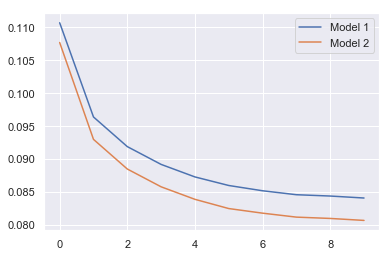

In [16]:


model1_loss = [0.1107, 0.0964, 0.0919, 0.0892, 0.0873, 0.0860, 0.0852, 0.0846, 0.0844, 0.0841]
model2_loss = [0.1077, 0.0930, 0.0885, 0.0858, 0.0839, 0.0825, 0.0818, 0.0812, 0.0810, 0.0807]


plt.plot(model1_loss, label='Model 1')
plt.plot(model2_loss, label='Model 2')
plt.legend(loc='upper right')
plt.show()

## Benchmark

<span class="rubric">
Student clearly defines a benchmark result or threshold for comparing performances of solutions obtained.
</span>

As any other Kaggle competition, submissions are benchmarked against the test set held by Jigsaw producing a score as per the _Evaluation metrics_ defined below.

Submissions to this competition must be made through Kernels, also the following conditions must be met:

-   CPU Kernel <= 9 hours run-time
-   GPU Kernel <= 2 hours run-time
-   No internet access enabled
-   External data, freely & publicly available, is allowed, including pre-trained models
-   No custom packages enabled in kernels
-   Submission file must be named "submission.csv"


The [Kaggle Completition Leaderboard](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/leaderboard) provides 3 benchmark kernels against which I'm measuring my score.

- **Benchmark Kernel** with a score of 0.88224
- **TOXICITY@1 Benchmark** with a score of 0.89082
- **TOXICITY@6 Benchmark** with a score of 0.89219




# Methodology


## Data Preprocessing

<span class="rubric">
    All preprocessing steps have been clearly documented. Abnormalities or characteristics about the data or input that needed to be addressed have been corrected. If no data preprocessing is necessary, it has been clearly justified.
</span>

## Implementation

<span class="rubric">
The process for which metrics, algorithms, and techniques were implemented with the given datasets or input data has been thoroughly documented. Complications that occurred during the coding process are discussed.
</span>


### Reproducibility

Due to the stochastic nature of Neural Networks it is not always possible to reproduce the same results over different runs. However in order to evaluate different algorithms implementations it is important to being able to have stable and reproducible results.

<span class="warn">
Keras's implementation of Neural Networks mantain its stochastic nature.

https://pytorch.org/docs/stable/notes/randomness.html

</span>

```
Reproducibility.RANDOM_SEED = 1234
Reproducibility.seed_everything()
```
## Refinement

<span class="rubric">
The process of improving upon the algorithms and techniques used is clearly documented. Both the initial and final solutions are reported, along with intermediate solutions, if necessary.
</span>

# Results

## Model Evaluation and Validation

<span class="rubric">
The final model’s qualities — such as parameters — are evaluated in detail. Some type of analysis is used to validate the robustness of the model’s solution.
</span>

## Justification

<span class="rubric">
The final results are compared to the benchmark result or threshold with some type of statistical analysis. Justification is made as to whether the final model and solution is significant enough to have adequately solved the problem.
</span>

# Conclusion

## Free-Form Visualization

<span class="rubric">
A visualization has been provided that emphasizes an important quality about the project with thorough discussion. Visual cues are clearly defined.
</span>

## Reflection

<span class="rubric">
Student adequately summarizes the end-to-end problem solution and discusses one or two particular aspects of the project they found interesting or difficult.
</span>

## Improvement

<span class="rubric">
Discussion is made as to how one aspect of the implementation could be improved. Potential solutions resulting from these improvements are considered and compared/contrasted to the current solution.
</span>

# Quality

## Presentation

<span class="rubric">
Project report follows a well-organized structure and would be readily understood by its intended audience. Each section is written in a clear, concise and specific manner. Few grammatical and spelling mistakes are present. All resources used to complete the project are cited and referenced.
</span>

In [44]:
%%html

<style>
    .warn {
        color: red;
    }
    .rubric {
        color: gray;
        border: 1px dashed gray;
        padding: 5px 4px;
        display: table;
        margin-top: 10px;        
    }
    .rubric.done {
        color: #e3eaa7;
    }
</style>